In [1]:
import rioxarray as rxr
import pandas as pd
import os
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#IDir = r'/Volumes/PhD/imagery/masters/output/MSM1/'
#IDir = r'/Volumes/PhD/imagery/masters/output/ROC/MSM1_ROC/'
IDir = r'/Volumes/PhD/imagery/masters/hyper/HSM1/'

#ODir = r'/Volumes/PhD/imagery/masters/output/ROC/design_storm/'
ODir = r'/Volumes/PhD/imagery/masters/hyper/'

In [24]:
def MSM1_stats(basin, image, plot = False):
    
    i_flat = image.values.flatten()
    pixarr = np.empty((i_flat.shape[0]), dtype= float)
    pixarr[:] = np.nan
    x = np.where(np.isnan(i_flat) == False)
        
    
    i_data = i_flat[x]
    mean_value = np.nanmean(i_data)
    median_value = np.nanmedian(i_data)
    kde = gaussian_kde(i_data)

    
    x_grid = np.linspace(i_data.min(), i_data.max(), 1000)

    
    kde_values = kde(x_grid)
   
    peak_index = kde_values.argmax()  
    peak_frequency = x_grid[peak_index]
    
    valid_data = i_flat[~np.isnan(i_flat)]

   
    percent_above_0_5 = np.sum(valid_data > 0.5) / len(valid_data) 
    percent_above_0_6 = np.sum(valid_data > 0.6) / len(valid_data) 
    percent_above_0_7 = np.sum(valid_data > 0.7) / len(valid_data) 
    percent_above_0_8 = np.sum(valid_data > 0.8) / len(valid_data) 
    percent_above_0_9 = np.sum(valid_data > 0.9) / len(valid_data) 

    basin_list.append(basin)
    RI_list.append(RI)
    mean_list.append(mean_value)
    median_list.append(median_value)
    peak_frequency_list.append(peak_frequency)
    above_60.append(percent_above_0_6)
    above_70.append(percent_above_0_7)
    above_80.append(percent_above_0_8)
    above_50.append(percent_above_0_5)
    above_90.append(percent_above_0_9)

    if plot == True:
        bin = np.arange(0, 1.05, 0.05)
        plt.figure(figsize=(10, 6))
        sns.histplot(valid_data, bins=bin, kde=True, alpha=.1)
        plt.axvline(x=mean_value, color='m', linestyle='--', label = f'Mean: {mean_value: .3f}')
        plt.axvline(x=median_value, color='b', linestyle='--', label = f'Median: {median_value: .3f}')
        plt.axvline(x=peak_frequency, color='y', linestyle='--', label = f'Peak Freq: {peak_frequency: .3f}')

        #plt.hist(valid_data, bins=bin, color='blue', alpha=0.7, edgecolor='black')  # Adjust bins as needed
        plt.title(f"Basin {basin} MSM1 Distribution")
        plt.xlabel("Probability")
        plt.ylabel("Frequency")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(loc='best')
        #plt.show()
        plt.savefig(os.path.join(ODir, f'{basin}_MSM1_Dist.png'), dpi = 300)
        plt.close()
        
   




In [25]:
basin_list = []
RI_list = []
mean_list = []
median_list = []
peak_frequency_list = []
above_50 = []
above_60 = []
above_70 = []
above_80 = []
above_90 = []

for filename in os.listdir(IDir):
    if filename.startswith("._"):
        print(f"Skipping file: {filename}")
        continue
    file = os.path.join(IDir, filename)
    basin = filename.split('_')
    #print(basin)
    RI = basin[2]
    RI = RI.split('.')
    RI = RI[0]
    RI = RI[0:2]
    basin = basin[0]
    image = rxr.open_rasterio(file)
    MSM1_stats(basin, image, False)
    
    
    


Skipping file: ._17346_hppp_12mmhr.tif
Skipping file: ._17346_hppp_16mmhr.tif
Skipping file: ._17346_hppp_20mmhr.tif
Skipping file: ._17346_hppp_24mmhr.tif
Skipping file: ._17346_hppp_28mmhr.tif
Skipping file: ._17346_hppp_32mmhr.tif
Skipping file: ._17346_hppp_36mmhr.tif
Skipping file: ._17346_hppp_40mmhr.tif
Skipping file: ._19384_hppp_12mmhr.tif
Skipping file: ._21224_hppp_12mmhr.tif
Skipping file: ._21224_hppp_16mmhr.tif
Skipping file: ._21224_hppp_20mmhr.tif
Skipping file: ._21224_hppp_24mmhr.tif
Skipping file: ._21224_hppp_28mmhr.tif
Skipping file: ._21224_hppp_32mmhr.tif
Skipping file: ._21224_hppp_36mmhr.tif
Skipping file: ._21224_hppp_40mmhr.tif
Skipping file: ._19384_hppp_16mmhr.tif
Skipping file: ._19384_hppp_20mmhr.tif
Skipping file: ._19384_hppp_24mmhr.tif
Skipping file: ._19384_hppp_28mmhr.tif
Skipping file: ._19384_hppp_32mmhr.tif
Skipping file: ._19384_hppp_36mmhr.tif
Skipping file: ._19384_hppp_40mmhr.tif
Skipping file: ._19451_hppp_12mmhr.tif
Skipping file: ._19451_hp

In [26]:
MSM1_df = {
    'BASIN_ID': basin_list,
    'RI': RI_list,
    'HSM1_M': mean_list,
    'HSM1_D': median_list,
    'HSM1_P': peak_frequency_list,
    'HSM1_>50': above_50,
    # 'MSM1_>60': above_60,
    # 'MSM1_>70': above_70,
    # 'MSM1_>80': above_80,
    'HSM1_>90': above_90
}
MSM1_df = pd.DataFrame(MSM1_df)
MSM1_df

,BASIN_ID,RI,HSM1_M,HSM1_D,HSM1_P,HSM1_>50,HSM1_>90
0,19384,12,0.237912,0.238848,0.246591,0.002465,0.000000
1,17346,12,0.199016,0.214046,0.248206,0.001187,0.000000
2,17346,16,0.336123,0.371853,0.440704,0.174670,0.000000
3,17346,20,0.485507,0.562707,0.659974,0.579543,0.002769
4,17346,24,0.612264,0.736642,0.829574,0.681592,0.073333
5,17346,28,0.704875,0.858759,0.918388,0.733644,0.368484
6,17346,32,0.769604,0.929658,0.959108,0.779606,0.576774
7,17346,36,0.815997,0.966362,0.978369,0.823906,0.653983
8,17346,40,0.850937,0.984239,0.988297,0.866545,0.694091
9,21224,12,0.119253,0.113727,0.054051,0.000000,0.000000


In [27]:
MSM1_df.to_csv(os.path.join(ODir, 'HSM1_P.csv'))

In [29]:
#fig_out = r'/Volumes/PhD/output/design_storm/'
MSM1_df = pd.read_csv(r'/Volumes/PhD/imagery/masters/hyper/HvM_total.csv')
MSM1_df

,BASIN_ID,RI,MSM1_M,MSM1_D,MSM1_P,MSM1_>50,MSM1_>90,M1P_M,M1P_D,M1P_P,HSM1_M,HSM1_D,HSM1_P,HSM1_>50,HSM1_>90,HM1P_M,HM1P_D,HM1P_P
0,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,0.156104,0.182727,0.199330,0.199016,0.214046,0.248206,0.001187,0.000000,0.177556,0.214046,0.252945
1,17346,16,0.282895,0.312747,0.341216,0.014239,0.000000,0.261148,0.312747,0.344347,0.336123,0.371853,0.440704,0.174670,0.000000,0.302801,0.371853,0.441777
2,17346,20,0.424137,0.480850,0.527555,0.445139,0.000000,0.403113,0.480850,0.525609,0.485507,0.562707,0.659974,0.579543,0.002769,0.466303,0.562707,0.649094
3,17346,24,0.562149,0.653404,0.710184,0.690135,0.000475,0.563404,0.653404,0.700363,0.612264,0.736642,0.829574,0.681592,0.073333,0.637379,0.736642,0.812155
4,17346,28,0.674204,0.793263,0.844383,0.742505,0.093584,0.711460,0.793263,0.831393,0.704875,0.858759,0.918388,0.733644,0.368484,0.779544,0.858759,0.909955
5,17346,32,0.756143,0.886490,0.919607,0.777470,0.435171,0.824911,0.886490,0.912299,0.769604,0.929658,0.959108,0.779606,0.576774,0.876750,0.929658,0.959383
6,17346,36,0.814537,0.940814,0.957877,0.816075,0.651926,0.900023,0.940814,0.956418,0.815997,0.966362,0.978369,0.823906,0.653983,0.934686,0.966362,0.982209
7,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403,0.945059,0.970018,0.978856,0.850937,0.984239,0.988297,0.866545,0.694091,0.966431,0.984239,0.992310
8,19384,12,0.201879,0.204130,0.214202,0.000000,0.000000,0.196986,0.204130,0.217143,0.237912,0.238848,0.246591,0.002465,0.000000,0.226732,0.238848,0.252385
9,19384,16,0.346602,0.353374,0.375004,0.039906,0.000000,0.339919,0.353374,0.377573,0.406153,0.416942,0.437575,0.247404,0.000000,0.395128,0.416942,0.440802


In [41]:

unique_basins = MSM1_df['BASIN_ID'].unique()
for basin in unique_basins:
    basin_data = MSM1_df[MSM1_df['BASIN_ID'] == basin]
    plt.figure(figsize=(10,6))
    sns.lineplot(x = basin_data['RI'], y = basin_data['M1P_M'], c = 'red', label = 'M1 Mean')
    sns.lineplot(x = basin_data['RI'], y = basin_data['HM1P_M'], c = 'red', linestyle = '--', label = 'HM1 Mean')
    sns.lineplot(x = basin_data['RI'], y = basin_data['MSM1_P'], c = 'cyan', label = 'MSM1 Peak Frequency')
    sns.lineplot(x = basin_data['RI'], y = basin_data['HSM1_P'], c = 'cyan', linestyle = '--',label = 'HSM1 Peak Frequency')
    sns.lineplot(x = basin_data['RI'], y = basin_data['MSM1_>50'], c = 'purple', label = 'MSM1 Area > 50%')
    sns.lineplot(x = basin_data['RI'], y = basin_data['HSM1_>50'], c = 'purple', linestyle = '--',label = 'HSM1 Area > 50%')
    sns.lineplot(x = basin_data['RI'], y = basin_data['MSM1_>90'], c = 'grey', label = 'MSM1 Area > 90%')
    sns.lineplot(x = basin_data['RI'], y = basin_data['HSM1_>90'], c = 'grey', linestyle = '--',label = 'HSM1 Area > 90%')

    plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    plt.ylim(0,1)
    plt.ylabel('PFDF Probability')
    plt.xlabel('Rainfall Intensity')
    plt.legend(loc='best')
    plt.title(f'Basin {basin}')
    
    plt.savefig(os.path.join(ODir, f'{basin}_HvsM.png'), dpi=300)
    
    plt.close()
    


In [6]:
M1_model = pd.read_csv(r'/Volumes/PhD/imagery/masters/output/ROC/design_storm/M1P_all.csv', index_col=0)
M1_model

,BASIN_ID,RI,M1P_M,M1P_D,M1P_P
0,123,12,0.064164,0.056530,0.053738
1,123,16,0.086012,0.072894,0.068209
2,123,20,0.114390,0.093525,0.086222
3,123,24,0.150589,0.119245,0.108438
4,123,28,0.195711,0.150860,0.135529
...,...,...,...,...,...
13883,44339,24,0.534098,0.537882,0.551855
13884,44339,28,0.682302,0.686137,0.700119
13885,44339,32,0.800933,0.804148,0.815712
13886,44339,36,0.882871,0.885211,0.893524


In [14]:
bid = '17346'
rbasin = MSM1_df[MSM1_df['BASIN_ID'] == bid]
rbasin['BASIN_ID'] = rbasin['BASIN_ID'].astype(int)
rbasin

/var/folders/mm/sjj0b1k91z39pkxfzn0rj_1h0000gn/T/ipykernel_29446/1045209195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbasin['BASIN_ID'] = rbasin['BASIN_ID'].astype(int)


,BASIN_ID,RI,MSM1_M,MSM1_D,MSM1_P,MSM1_>50,MSM1_>90
2136,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000
2137,17346,16,0.282895,0.312747,0.341216,0.014239,0.000000
2138,17346,20,0.424137,0.480850,0.527555,0.445139,0.000000
2139,17346,24,0.562149,0.653404,0.710184,0.690135,0.000475
2140,17346,28,0.674204,0.793263,0.844383,0.742505,0.093584
2141,17346,32,0.756143,0.886490,0.919607,0.777470,0.435171
2142,17346,36,0.814537,0.940814,0.957877,0.816075,0.651926
2143,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403


In [ ]:
r_basin = M1_model[M1_model['BASIN_ID'] == 17346]
r
r_basin

,BASIN_ID,RI,M1P_M,M1P_D,M1P_P
4952,17346,12,0.156104,0.182727,0.199330
4953,17346,16,0.261148,0.312747,0.344347
4954,17346,20,0.403113,0.480850,0.525609
4955,17346,24,0.563404,0.653404,0.700363
4956,17346,28,0.711460,0.793263,0.831393
4957,17346,32,0.824911,0.886490,0.912299
4958,17346,36,0.900023,0.940814,0.956418
4959,17346,40,0.945059,0.970018,0.978856


In [21]:
merged_bid = pd.merge(rbasin, r_basin, on= 'BASIN_ID', how='left')
#merged_bid.drop('RI_y',axis=1, inplace=True)
merged_bid

,BASIN_ID,RI_x,MSM1_M,MSM1_D,MSM1_P,MSM1_>50,MSM1_>90,RI_y,M1P_M,M1P_D,M1P_P
0,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,12,0.156104,0.182727,0.199330
1,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,16,0.261148,0.312747,0.344347
2,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,20,0.403113,0.480850,0.525609
3,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,24,0.563404,0.653404,0.700363
4,17346,12,0.167963,0.182727,0.196653,0.000000,0.000000,28,0.711460,0.793263,0.831393
...,...,...,...,...,...,...,...,...,...,...,...
59,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403,24,0.563404,0.653404,0.700363
60,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403,28,0.711460,0.793263,0.831393
61,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403,32,0.824911,0.886490,0.912299
62,17346,40,0.857194,0.970018,0.977971,0.877067,0.705403,36,0.900023,0.940814,0.956418


Text(0.5, 1.0, 'Basin 9997')

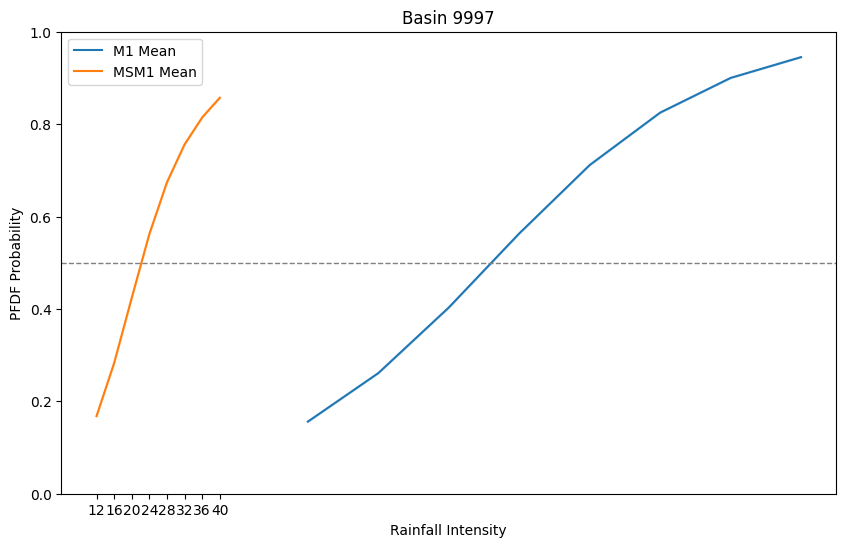

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x = merged_bid['RI_y'], y = merged_bid['M1P_M'], label = 'M1 Mean')
sns.lineplot(x = merged_bid['RI_x'], y = merged_bid['MSM1_M'], label = 'MSM1 Mean')

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
plt.ylim(0,1)
plt.legend(loc='best')
plt.ylabel('PFDF Probability')
plt.xlabel('Rainfall Intensity')
plt.title(f'Basin {basin}')
#plt.savefig(os.path.join(fig_out, f'{basin}_M1_pvis.png'), dpi=300)
#plt.close()

In [10]:
unique_basins = M1_model['BASIN_ID'].unique()
for basin in unique_basins:
    basin_data = M1_model[M1_model['BASIN_ID'] == basin]
    plt.figure(figsize=(10,6))
    sns.lineplot(x = basin_data['RI'], y = basin_data['M1P_M'], label = 'M1 Mean')
    sns.lineplot(x = basin_data['RI'], y = basin_data['M1P_D'], label = 'M1 Median')
    sns.lineplot(x = basin_data['RI'], y = basin_data['M1P_P'], label = 'M1 Peak Frequency')

    plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
    plt.ylim(0,1)
    plt.legend(loc='best')
    plt.ylabel('PFDF Probability')
    plt.xlabel('Rainfall Intensity')
    plt.title(f'Basin {basin}')
    plt.savefig(os.path.join(fig_out, f'{basin}_M1_pvis.png'), dpi=300)
    plt.close()
    

In [11]:
df_12 = MSM1_df[MSM1_df['RI'] == 12]
df_12

,BASIN_ID,RI,MSM1P_Mean,MSM1P_Med,MSM1P_PF,MSM1_>50,MSM1_>90


In [6]:
MSM1_df.to_csv(os.path.join(ODir, 'MSM1_design-storm.csv'))

In [6]:
updated_df = pd.read_csv(r'/Volumes/PhD/imagery/masters/output/ROC/design_storm/MSM1_design-storm_edited.csv')
updated_df.drop(columns=['Unnamed: 0'], inplace=True)
updated_df

,BASIN_ID,RI,MSM1P_Mean,MSM1P_Med,MSM1P_PF,MSM1_>50,MSM1_>90
0,10009,12,0.240171,0.221695,0.200251,0.000000,0.000000
1,10048,12,0.136815,0.128381,0.120497,0.000000,0.000000
2,10058,12,0.229798,0.215690,0.214372,0.000000,0.000000
3,10060,12,0.234771,0.236290,0.239873,0.000000,0.000000
4,10104,12,0.270076,0.252555,0.247749,0.000000,0.000000
...,...,...,...,...,...,...,...
13883,9942,40,0.578477,0.552754,0.345974,0.514706,0.066176
13884,9959,40,0.997571,0.997986,0.998246,1.000000,1.000000
13885,9974,40,0.996828,0.998789,0.999022,1.000000,1.000000
13886,9985,40,0.970748,0.981729,0.986507,1.000000,0.973684


In [19]:
# Pivot the DataFrame
pivoted_df = updated_df.pivot(
    index='BASIN_ID',       # Each unique BASIN_ID as a row
    columns='RI',           # Each RI value becomes a column group
    values=['MSM1P_Mean', 'MSM1P_Med', 'MSM1P_PF', 'MSM1_>50', 'MSM1_>90']  # Metrics to organize
)

# Flatten the MultiIndex columns
pivoted_df.columns = ['{}_RI{}'.format(metric, int(ri)) for metric, ri in pivoted_df.columns]

# Reset index to bring BASIN_ID back as a column
pivoted_df = pivoted_df.reset_index()

# Display the final DataFrame
pivoted_df

# Save the result to a CSV if needed
pivoted_df.to_csv(os.path.join(ODir, 'MSM1_compact_design-storm.csv'), index=False)

In [20]:
pivoted_df

,BASIN_ID,MSM1P_Mean_RI12,MSM1P_Mean_RI16,MSM1P_Mean_RI20,MSM1P_Mean_RI24,MSM1P_Mean_RI28,MSM1P_Mean_RI32,MSM1P_Mean_RI36,MSM1P_Mean_RI40,MSM1P_Med_RI12,...,MSM1_>50_RI36,MSM1_>50_RI40,MSM1_>90_RI12,MSM1_>90_RI16,MSM1_>90_RI20,MSM1_>90_RI24,MSM1_>90_RI28,MSM1_>90_RI32,MSM1_>90_RI36,MSM1_>90_RI40
0,123,0.068145,0.094791,0.129986,0.173290,0.222621,0.275384,0.329658,0.384438,0.056530,...,0.187389,0.227612,0.0,0.0,0.0,0.000000,0.000063,0.000316,0.018846,0.062800
1,155,0.110949,0.174425,0.257951,0.352820,0.447686,0.535341,0.613690,0.683055,0.084037,...,0.517751,0.674556,0.0,0.0,0.0,0.000000,0.004438,0.093195,0.232249,0.334320
2,167,0.123761,0.198465,0.297309,0.409609,0.521182,0.622334,0.709075,0.780702,0.107684,...,0.792135,0.955056,0.0,0.0,0.0,0.000000,0.000000,0.123596,0.269663,0.365169
3,172,0.125566,0.202322,0.301807,0.410196,0.512555,0.601957,0.678192,0.743029,0.102787,...,0.652921,0.790378,0.0,0.0,0.0,0.000000,0.000000,0.211340,0.359107,0.412371
4,184,0.203214,0.350832,0.531211,0.700743,0.826702,0.905762,0.950531,0.974481,0.209799,...,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.016260,0.715447,0.910569,0.975610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,44218,0.061878,0.082557,0.109481,0.143726,0.185919,0.235903,0.292565,0.353970,0.056792,...,0.091190,0.222566,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1732,44238,0.068688,0.094332,0.128274,0.171916,0.225962,0.289943,0.361966,0.438868,0.067951,...,0.105761,0.306931,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000450,0.001800
1733,44256,0.082278,0.118799,0.168485,0.233099,0.312403,0.403329,0.500167,0.595911,0.080229,...,0.402299,0.919540,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1734,44320,0.238439,0.402866,0.573418,0.715436,0.818857,0.888151,0.932223,0.959388,0.219513,...,1.000000,1.000000,0.0,0.0,0.0,0.223005,0.382629,0.610329,0.781690,0.880282
